
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
This dataset collects information from 100k medical appointments in Brazil and is focussed on the question of whether or not patients show up for their appointment. This No-show dataset has 14 columns with the description below:
- *'PatientId'* - Identification of a patient
- *'AppointmentID'* - Identifies each appointment
- *'Gender'* - Male or Female
- *'ScheduledDay'* - The actual day of the appointment
- *'AppointmentDay'* - The day someone registered the appointment
- *'Age'* - How old the patient is
- *'Neighbourhood'* - Where the appointment takes place
- *'Scholarship'* - True or False (whether the patient has Government sponsirship or no)
- *'Hipertension'* - True or False (whether the patient has the Hipertension or no)
- *'Diabetes'* - True or False (whether the patient is diabetic or no)
- *'Alcoholism'* - True of False(whether the patient is an alcoholic or no)
- *'Handcap'* - True of False(whether the patient is an Hancapped or no)
- *'SMS_recieved'* - 1 or more messages sent to the patient
- *'No-show'* - True or False (whether the patient showed up for the appointment or no)


### Question(s) for Analysis

#### 1.What is the relationship between Gender and No-show?
#### 2.Is SMS_received likely to have an influence on No-show?
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('noshowappointments_may_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check the number of columns and rows
df.shape

(110527, 14)

In [5]:
#check the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#We need to drop the irrelevant columns in our analysis 
#and change the column names to lowercase for ease of reference



### Data Cleaning
 

In [9]:
#Lets drop the 'PatientId' and 'AppointmentId' since we will not need them in our analysis
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace=True)

In [10]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [11]:
#check the shape to see the changes
df.shape

(110527, 9)

In [12]:
#rename the 'no-show' column
df = df.rename(columns={'No-show':'no_show'})
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [13]:
#convert the column namees to lowercase for ease of reference
df = df.rename(columns=lambda x: x.strip().lower())
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [14]:
#convert the no_show column to (1,0) for consistency in those who showed up
df['no_show'] = df['no_show'].replace(['No','Yes'],(1,0))

In [15]:
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,0,1,0,0,0,0,1
1,M,56,0,0,0,0,0,0,1
2,F,62,0,0,0,0,0,0,1
3,F,8,0,0,0,0,0,0,1
4,F,56,0,1,1,0,0,0,1


In [16]:
#check the shape to make sure no data is lost
df.shape

(110527, 9)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the relationship between gender and no_show?)

In [17]:
#let's create summary statistics for our data
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [18]:
#we can see that:
#the min age = -1 and max = 115
#9% had scholarships
#20% had hypertension
#7% were diabetic
#3% were alcoholics
#2% were handcapped
#32% recieved sms
#79% showed up for appointments

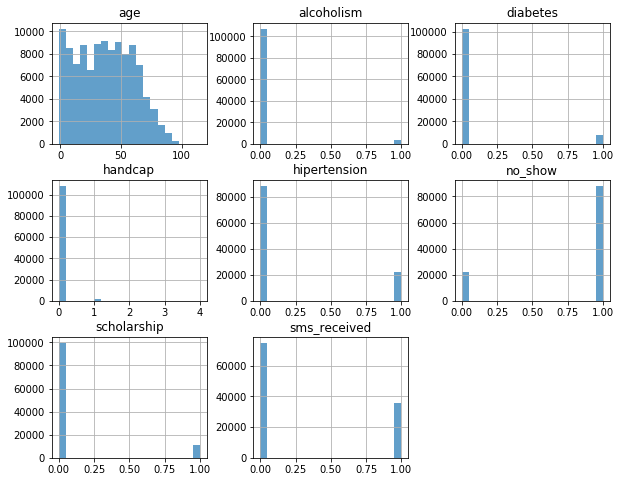

In [19]:
#plot a histogram for the data set
df.hist(alpha=0.7, bins=20, figsize=(10,8));

In [20]:
#check the total distribution of gender
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

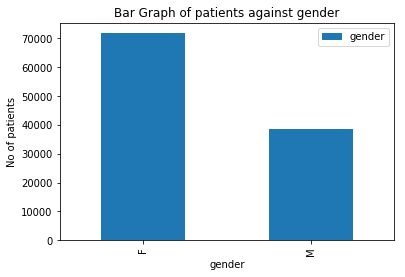

In [21]:
#plot a bar graph of gender
df['gender'].value_counts().plot(kind='bar');
plt.xlabel('gender')
plt.ylabel('No of patients')
plt.title('Bar Graph of patients against gender');
plt.legend();
#There are more females than males as illustrated below

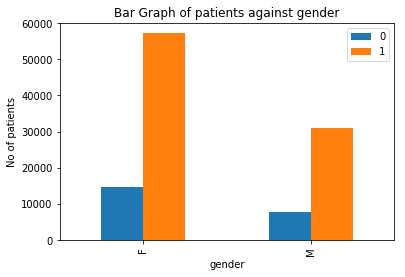

In [22]:
#check the association between gender and no_show variables
#use groupby
df.groupby('gender')['no_show'].value_counts().unstack().plot(kind='bar', alpha=1)
plt.legend()
plt.xlabel('gender')
plt.ylabel('No of patients')
plt.title('Bar Graph of patients against gender');
#There are more females than males who showed up for appointments

In [23]:
#check the distribution of those who showed up in terms of gender
df.gender[df.no_show == True].value_counts()

F    57246
M    30962
Name: gender, dtype: int64

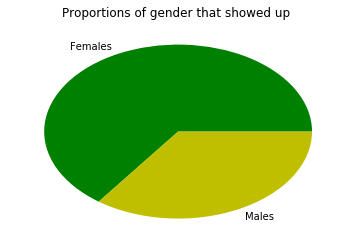

In [24]:
#plot a pie chart of those who showed up in terms of gender
df_show = np.array(df.gender[df.no_show == True].value_counts())
df_labels = ['Females', 'Males']
df_colors = ['g', 'y']
plt.title('Proportions of gender that showed up ')
plt.pie(df_show, labels=df_labels, colors=df_colors)
plt.show();
#it is clear that more females than males showed up for their appointments 
#indicating a correlation between gender and no_show

### Research Question 2 : is sms_received likely to have an impact on no_show?

In [25]:
#check the number of those who received and those who did not receive sms
df.sms_received.value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

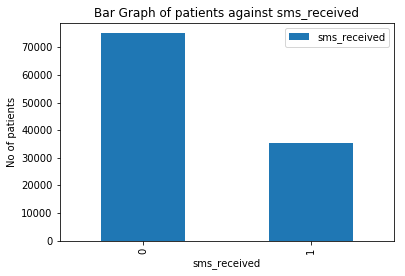

In [26]:
#plot a bar graph of sms_received
df['sms_received'].value_counts().plot(kind='bar');
plt.xlabel('sms_received')
plt.ylabel('No of patients')
plt.title('Bar Graph of patients against sms_received');
plt.legend();
#Most of the patients did not receive sms as shwon below

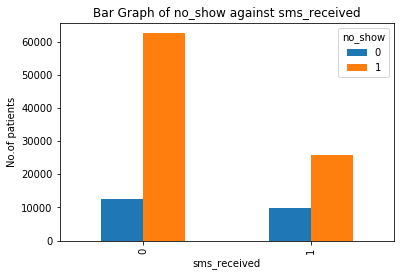

In [27]:
#explore the association between sms_received and no_show
#write a function to plot a bar graph of no_show against sms_received
def plot(z, x_label, y_label, title):
    df.groupby([z])['no_show'].value_counts().unstack().plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);
    
plot('sms_received', 'sms_received', 'No.of patients', 'Bar Graph of no_show against sms_received')
#There are more patients who showed up for their appointments and did not receive an sms than
#those who received an sms and did not show up

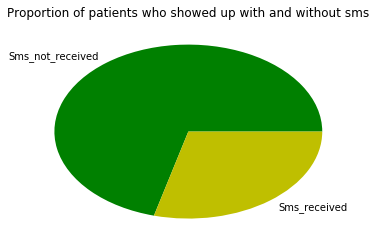

In [28]:
#plot those who showed up for appointment with and without an sms
df_sms_showed = np.array(df.sms_received[df.no_show == True].value_counts())
df_labels = ['Sms_not_received', 'Sms_received']
df_colors = ['g', 'y']
plt.pie(df_sms_showed, labels=df_labels, colors=df_colors)
plt.title('Proportion of patients who showed up with and without sms')
plt.show();
#there are more patients who showed up without an sms than those who received an sms

<a id='conclusions'></a>
## Conclusions

 ### Results:
 Our data suggests that: 
  1. There is a higher proportion of females than males who showed up for the appointment
  2. There is a higher number of people that showed up and did not receive an sms when compared to patients who received an sms and did show up.
  
### Limitations:
There are a number of limitations with our data: 
 1. Most of our variables are categorical which does not allow for a high level of statistical method that can be used to provide correlations
 2. We do not have a lot of details for certain factors to draw conclusions . For instance, the sms_received, the data shows that no_showers are likely to recieve an SMS. This may seem counter intutive, but we do not have information on the conditions of when the sms is sent. For example, they may target no_showers with SMS, or they may send the SMS once the patient has not checked in 30 minutes prior to thier appointment. 
  
## Submitting your Project 


In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0